In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Now lets plot some images to see what they are:

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

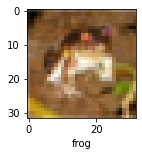

In [12]:
plot_sample(X_train, y_train, 0)

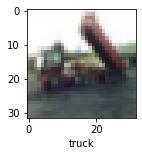

In [14]:
plot_sample(X_train, y_train, 2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

#Normalizing the training data

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#Build simple artificial neural network for image classification

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.8118 - accuracy: 0.3568
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6232 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5426 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4826 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4315 - accuracy: 0.4954


You can see that at the end of 5 epochs, accuracy is at around 49%

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.54      1000
           1       0.63      0.59      0.61      1000
           2       0.36      0.43      0.39      1000
           3       0.32      0.49      0.39      1000
           4       0.44      0.39      0.41      1000
           5       0.57      0.20      0.30      1000
           6       0.53      0.50      0.51      1000
           7       0.51      0.63      0.57      1000
           8       0.53      0.71      0.60      1000
           9       0.63      0.45      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



#Now let us build a convolutional neural network to train our images

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4746 - accuracy: 0.4708
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1105 - accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9855 - accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8986 - accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8329 - accuracy: 0.7097
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7796 - accuracy: 0.7270
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7265 - accuracy: 0.7449
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6907 - accuracy: 0.7576
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6460 - accuracy: 0.7740
Epoch 10/10
1563/1563 [==============================] - 57s 37m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9384 - accuracy: 0.6971


[0.9383512735366821, 0.6970999836921692]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.0987664e-04, 1.4344829e-05, 3.4158141e-04, 7.4582809e-01,
        1.4127317e-04, 2.1055649e-01, 4.0274389e-02, 7.4223017e-06,
        2.2205855e-03, 1.0603488e-04],
       [5.0627429e-02, 2.1812277e-01, 1.3900710e-06, 3.9639867e-06,
        5.8806791e-07, 7.2254402e-08, 7.2631798e-07, 1.4921244e-07,
        7.2484350e-01, 6.3994727e-03],
       [5.2769445e-02, 4.3304950e-01, 3.0142546e-03, 3.8410088e-03,
        1.1693381e-03, 8.1210572e-05, 6.3679449e-04, 6.5066211e-04,
        4.9248537e-01, 1.2302378e-02],
       [8.9146870e-01, 3.5552445e-03, 1.6256519e-02, 3.3186707e-03,
        3.7742262e-03, 1.6957814e-05, 3.3033625e-03, 1.6167038e-05,
        7.8178585e-02, 1.1166347e-04],
       [2.7583076e-09, 8.6315658e-06, 7.2997087e-04, 1.3129239e-02,
        5.3343815e-01, 5.9410115e-04, 4.5209789e-01, 1.7331566e-07,
        1.7524823e-06, 2.0634481e-08]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

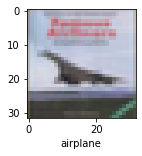

In [25]:
plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'

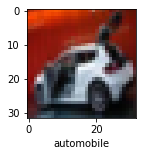

In [29]:
plot_sample(X_test, y_test,6)

In [32]:
classes[y_classes[6]]

'cat'